In [25]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pandas as pd
from os import path
from scipy.cluster.hierarchy import dendrogram, linkage 

fig_size = plots.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plots.rcParams["figure.figsize"] = fig_size

In [26]:
ALL_SUITS_CSV_NAME = "all_lawsuits_2008_to_2019.xlsx"
ALL_POLICE_SUITS_CSV = "police_lawsuits_2008_to_2019.xlsx"

### Loading Lawsuit Data

This restrict it to only police lawsuits

In [27]:
police_total = pd.read_csv(ALL_POLICE_SUITS_CSV)
police_total.head(7)

,Case Number,Payee,Payment Amount,Fees and Costs,Primary Cause,City Department Involved,Disposition,Tort,Date to Comptroller,Year to Comptroller,Month to Comptroller,Payment Amount(millions),Fees and Costs(millions),Total Paid,Total Paid(millions),Payment Fund,Effective Date,Due Date,Client Department
0,182-A01052-1,IDA ESPER,0.0,1219.0,DAMAGE TO PROPERTY DURING OPERATIONS,POLICE,CONSULTANT,1.0,2008-01-04 00:00:00.000,2008.0,1.0,0.00000,0.001219,1219.0,0.001219,NaN,NaN,NaN,NaN
1,06 C 7155,"MCFADDEN, JEFFREY",72500.0,0.0,EXCESSIVE FORCE/SERIOUS,POLICE,SETTLEMENT,1.0,2008-01-08 00:00:00.000,2008.0,1.0,0.07250,0.000000,72500.0,0.072500,NaN,NaN,NaN,NaN
2,07 C 1319,"KOPKO,JR., FRED. ON BEHALF OF CATHERINE A MINO...",20000.0,0.0,OTHER POLICE MISCONDUCT,POLICE,SETTLEMENT,1.0,2008-01-08 00:00:00.000,2008.0,1.0,0.02000,0.000000,20000.0,0.020000,NaN,NaN,NaN,NaN
3,07 C 1480,"SANDERS,S.&C., ALLEN, MYRTLE & SANDERS, T.& J....",99000.0,0.0,EXTENDED DETENTION/MALICIOUS PROSECUTION,POLICE,SETTLEMENT,1.0,2008-01-08 00:00:00.000,2008.0,1.0,0.09900,0.000000,99000.0,0.099000,NaN,NaN,NaN,NaN
4,07 C 2710,"SMITH, CLARENCE",6250.0,0.0,FALSE ARREST,POLICE,SETTLEMENT,1.0,2008-01-08 00:00:00.000,2008.0,1.0,0.00625,0.000000,6250.0,0.006250,NaN,NaN,NaN,NaN
5,07 C 3927,"SMITH, CLARENCE",6250.0,0.0,FALSE ARREST,POLICE,SETTLEMENT,1.0,2008-01-08 00:00:00.000,2008.0,1.0,0.00625,0.000000,6250.0,0.006250,NaN,NaN,NaN,NaN
6,07 M1 301434,"CHRISTOPHER, DONIKA A MINOR BY CHRISTOPHER, BE...",8500.0,0.0,EXCESSIVE FORCE/MINOR,POLICE,SETTLEMENT,1.0,2008-01-08 00:00:00.000,2008.0,1.0,0.00850,0.000000,8500.0,0.008500,NaN,NaN,NaN,NaN


In [28]:
#Dataframe of only Moter Vehicle Accident suits
police_total_MVA= police_total[police_total['Primary Cause'] == 'MVA/Property Damage']
#Dataframe of only non-Moter Vehicle Accident suits
police_total_nonMVA= police_total[police_total['Primary Cause'] != 'MVA/Property Damage']
police_total['Primary Cause'].nunique()

226

### Exploring the Data
General Information

In [29]:
print('Statistics for all lawsuits')
print(police_total['Total Paid(millions)'].describe())
print(police_total['Total Paid'].sum())

Statistics for all lawsuits
count    4768.000000
mean        0.132623
std         0.733499
min        -1.500000
25%         0.002235
50%         0.007603
75%         0.040000
max        20.923883
Name: Total Paid(millions), dtype: float64
632348067.5999999


In [30]:
#groups by year then sums
police_sum_by_year = police_total.groupby('Year to Comptroller').sum()
police_sum_by_year['Year'] = police_sum_by_year.index
police_sum_by_year['Year'] = police_sum_by_year['Year'].astype('int64')
#groups by year then counts
police_count_by_year = police_total.groupby('Year to Comptroller').count()
police_count_by_year['Year'] = police_count_by_year.index
police_count_by_year['Year'] = police_count_by_year['Year'].astype('int64')


No handles with labels found to put in legend.


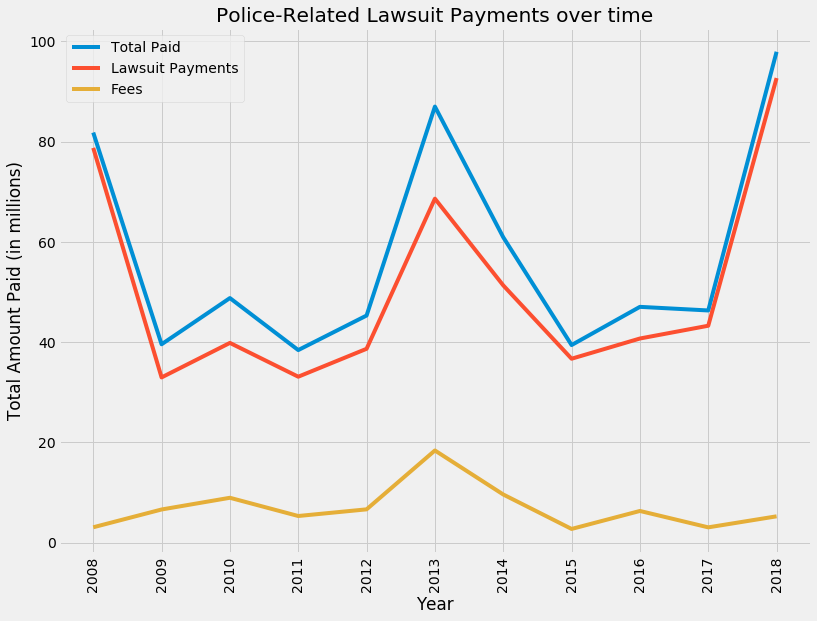

In [31]:
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Total Paid(millions)'])
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Payment Amount(millions)'])
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Fees and Costs(millions)'])
plots.xticks(np.arange(2008, 2019, step=1))
plots.xticks(rotation = 90)
plots.xlabel('Year')
plots.ylabel('Total Amount Paid (in millions)')
plots.title('Police-Related Lawsuit Payments over time')
plots.legend(loc = 'upper left')
mylabels = ['Total Paid', 'Lawsuit Payments', 'Fees']
plots.legend(labels=mylabels)

Text(0, 0.5, 'Total Lawsuits per Year')

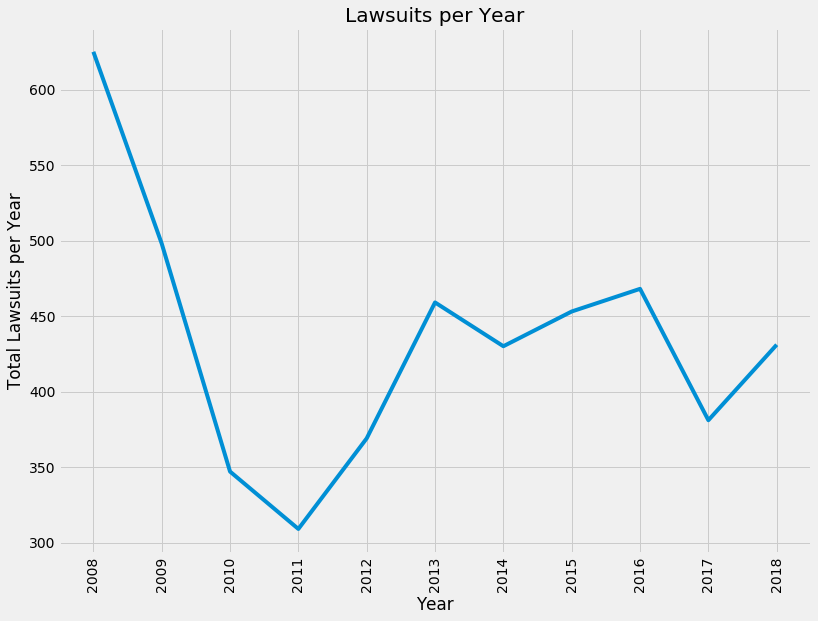

In [32]:
plots.plot(police_count_by_year['Year'], police_count_by_year['Payee'])


plots.xticks(np.arange(2008, 2019, step=1))
#plots.yticks(np.arange(.25, 1, step=.25))
plots.xticks(rotation = 90)
plots.title('Lawsuits per Year')
plots.xlabel('Year')
plots.ylabel('Total Lawsuits per Year')

/Users/philiposullivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(1900, -0.1, 'MVA/Property Damage')

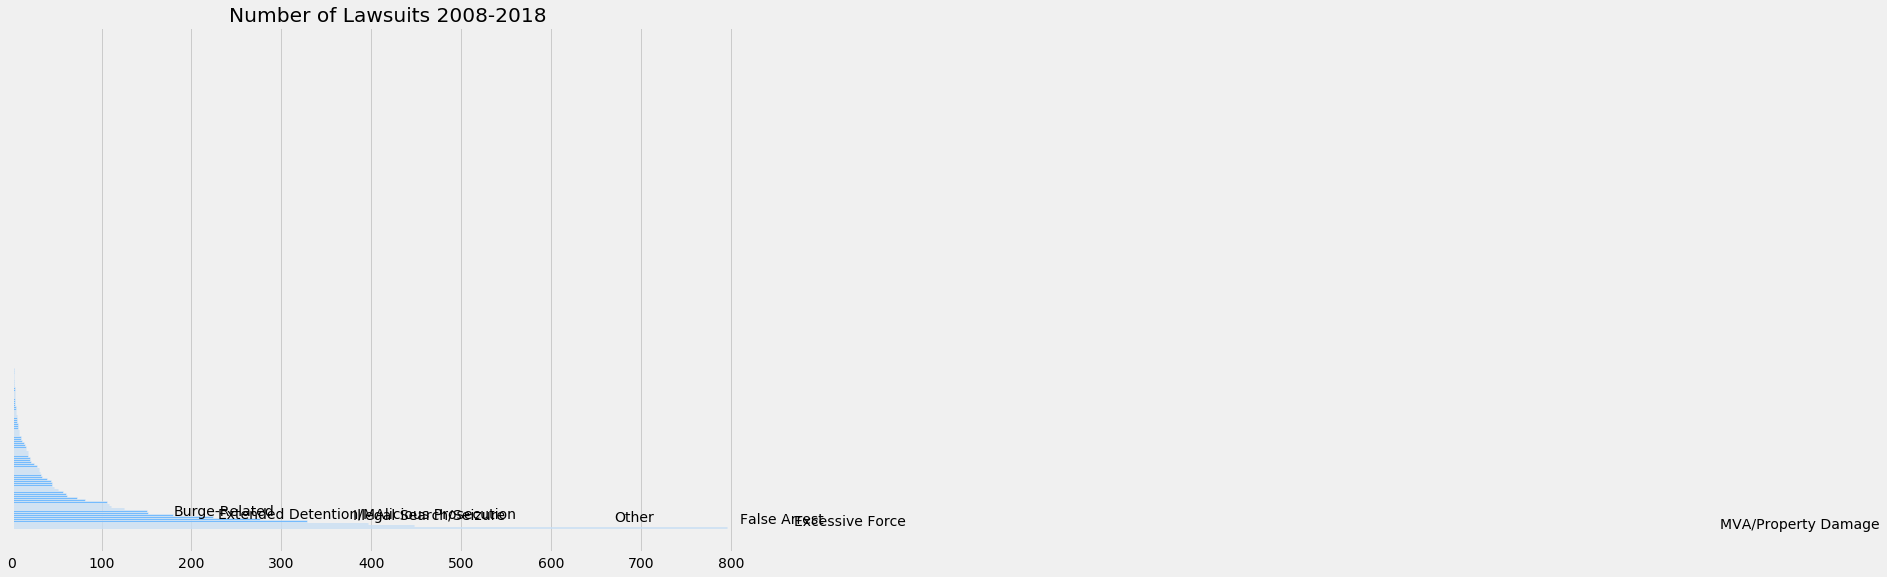

In [33]:
plots.title('Number of Lawsuits 2008-2018')
plots.barh(police_total['Primary Cause'].value_counts().index,police_total['Primary Cause'].value_counts(),color="xkcd:sky blue")
ay1 = plots.axes()
y_axis = ay1.axes.get_yaxis()
y_axis.set_visible(False)
plots.text(180,5.9, 'Burge-Related')
plots.text(230,4.9, 'Extended Detention/MAlicious Prosecution')
plots.text(380,3.9,'Illegal Search/Seizure')
plots.text(670,2.9,'Other')
plots.text(810,1.9,'False Arrest')
plots.text(870,0.9,'Excessive Force')
plots.text(1900,-0.1,'MVA/Property Damage')

(0, 0.1)

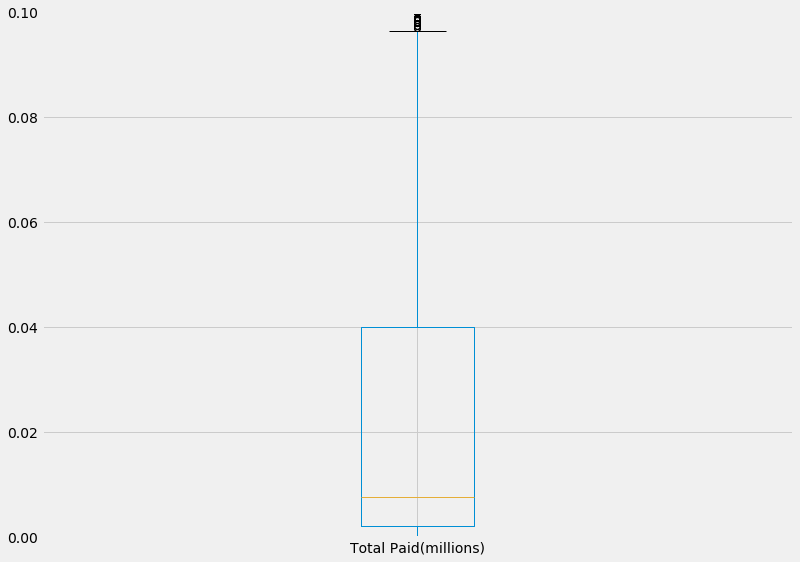

In [34]:
police_total.boxplot(column=['Total Paid(millions)'])
plots.ylim(0, .1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19fa3400>]],
      dtype=object)

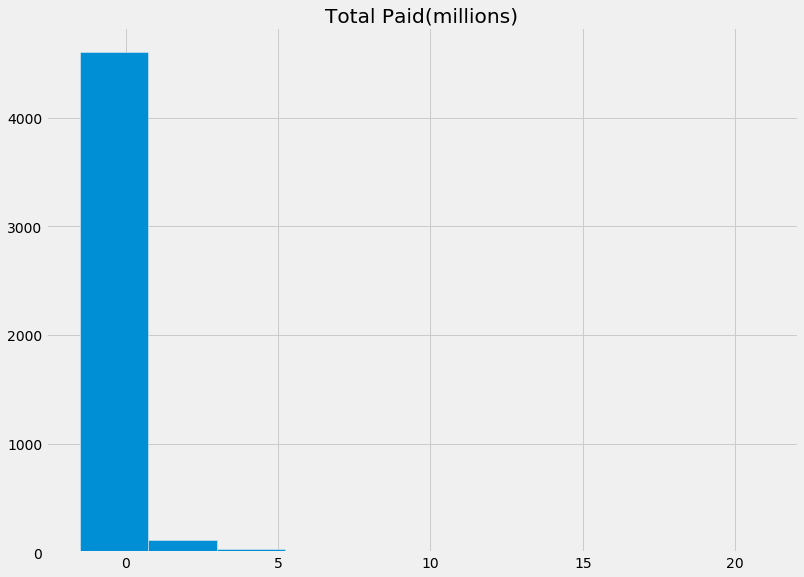

In [35]:
police_total.hist(column=['Total Paid(millions)'])#, bins=20, range=(0,0.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a487278>]],
      dtype=object)

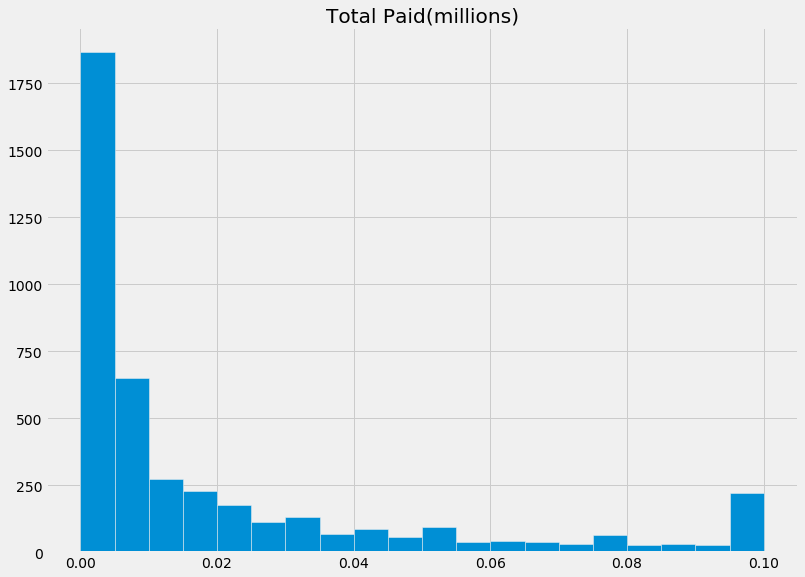

In [36]:
police_total.hist(column=['Total Paid(millions)'], bins=20, range=(0,0.1))

### Exploring MVA versus non-MVA Cases

In [37]:
#General statistics on all lawsuits and then MVA vs non-MVA
print('Statistics for all lawsuits')
print(police_total['Total Paid(millions)'].describe())
print('\nStatistics for MVA lawsuits')
print(police_total_MVA['Total Paid(millions)'].describe())
print('\nStatistics for Non-MVA lawsuits')
print(police_total_nonMVA['Total Paid(millions)'].describe())

Statistics for all lawsuits
count    4768.000000
mean        0.132623
std         0.733499
min        -1.500000
25%         0.002235
50%         0.007603
75%         0.040000
max        20.923883
Name: Total Paid(millions), dtype: float64

Statistics for MVA lawsuits
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total Paid(millions), dtype: float64

Statistics for Non-MVA lawsuits
count    4768.000000
mean        0.132623
std         0.733499
min        -1.500000
25%         0.002235
50%         0.007603
75%         0.040000
max        20.923883
Name: Total Paid(millions), dtype: float64


In [38]:
#sums for MVA
policeMVA_sum_by_year = police_total_MVA.groupby('Year to Comptroller').sum()
policeMVA_sum_by_year['Year'] = policeMVA_sum_by_year.index
policeMVA_sum_by_year['Year'] = policeMVA_sum_by_year['Year'].astype('int64')
#sums for non-MVA
policenonMVA_sum_by_year = police_total_nonMVA.groupby('Year to Comptroller').sum()
policenonMVA_sum_by_year['Year'] = policenonMVA_sum_by_year.index
policenonMVA_sum_by_year['Year'] = policenonMVA_sum_by_year['Year'].astype('int64')

No handles with labels found to put in legend.


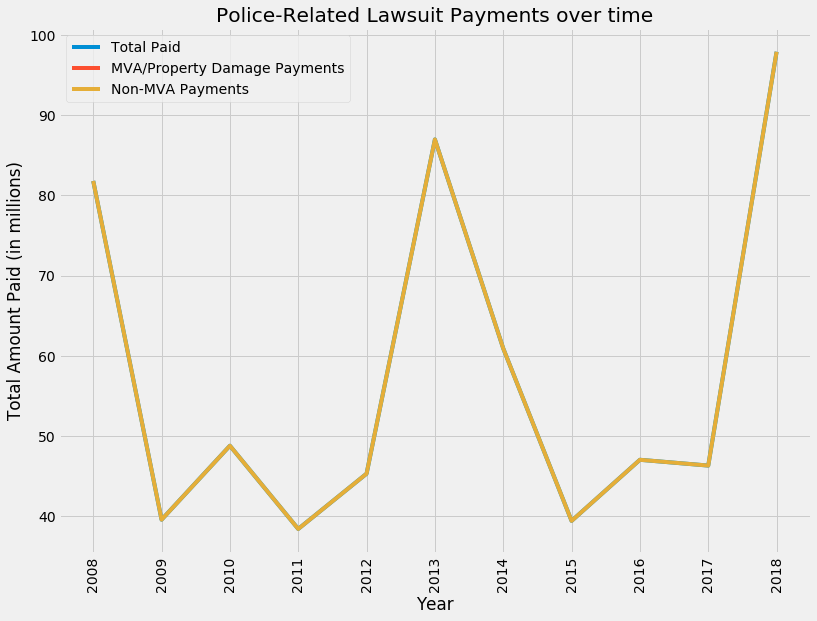

In [39]:
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Total Paid(millions)'])
plots.plot(policeMVA_sum_by_year['Year'], policeMVA_sum_by_year['Total Paid(millions)'])
plots.plot(policenonMVA_sum_by_year['Year'], policenonMVA_sum_by_year['Total Paid(millions)'])
plots.xticks(np.arange(2008, 2019, step=1))
#plots.yticks(np.arange(.25, 1, step=.25))
plots.xticks(np.arange(2008, 2019, step=1))
plots.xticks(rotation = 90)
plots.xlabel('Year')
plots.ylabel('Total Amount Paid (in millions)')
plots.title('Police-Related Lawsuit Payments over time')
plots.legend(loc = 'upper left')
mylabels = ['Total Paid', 'MVA/Property Damage Payments', 'Non-MVA Payments']
plots.legend(labels=mylabels)

In [40]:
#counts for MVA
policeMVA_count_by_year = police_total_MVA.groupby('Year to Comptroller').count()
policeMVA_count_by_year['Year'] = policeMVA_count_by_year.index
policeMVA_count_by_year['Year'] = policeMVA_count_by_year['Year'].astype('int64')
#counts for MVA
policenonMVA_count_by_year = police_total_nonMVA.groupby('Year to Comptroller').count()
policenonMVA_count_by_year['Year'] = policenonMVA_count_by_year.index
policenonMVA_count_by_year['Year'] = policenonMVA_count_by_year['Year'].astype('int64')

No handles with labels found to put in legend.


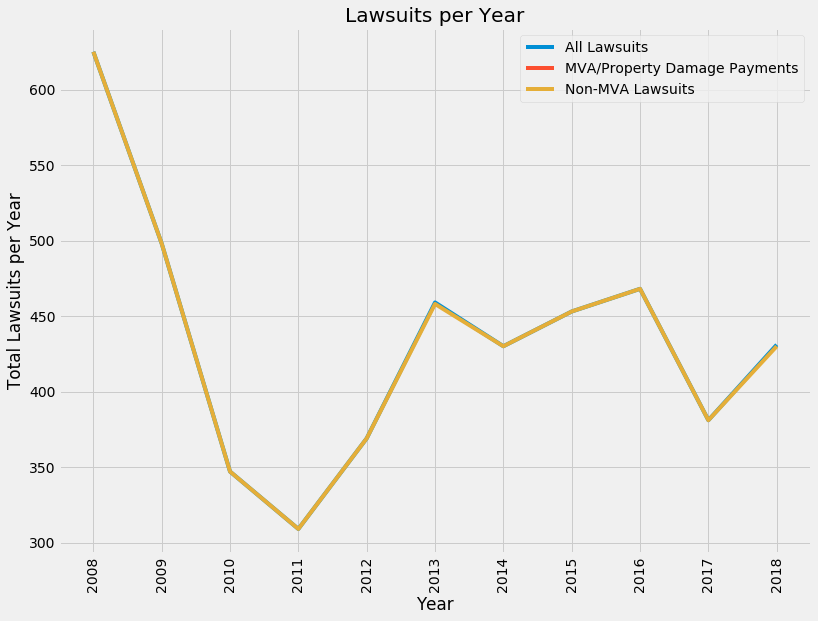

In [41]:
plots.plot(police_count_by_year['Year'], police_count_by_year['Payee'])
plots.plot(policeMVA_count_by_year['Year'], policeMVA_count_by_year['Total Paid(millions)'])
plots.plot(policenonMVA_count_by_year['Year'], policenonMVA_count_by_year['Total Paid(millions)'])

plots.xticks(np.arange(2008, 2019, step=1))
#plots.yticks(np.arange(.25, 1, step=.25))
plots.xticks(rotation = 90)
plots.title('Lawsuits per Year')
plots.xlabel('Year')
plots.ylabel('Total Lawsuits per Year')
plots.legend(loc = 'upper right')
mylabels = ['All Lawsuits', 'MVA/Property Damage Payments', 'Non-MVA Lawsuits']
plots.legend(labels=mylabels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a190ada20>]],
      dtype=object)

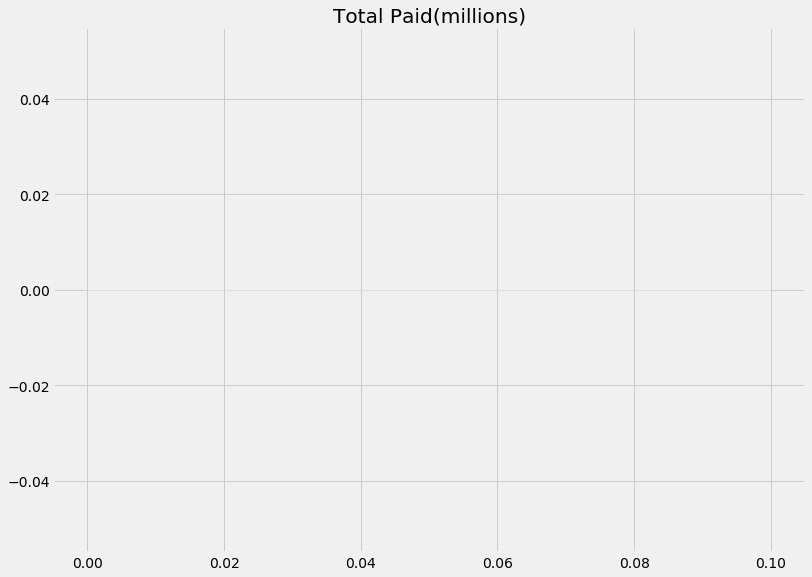

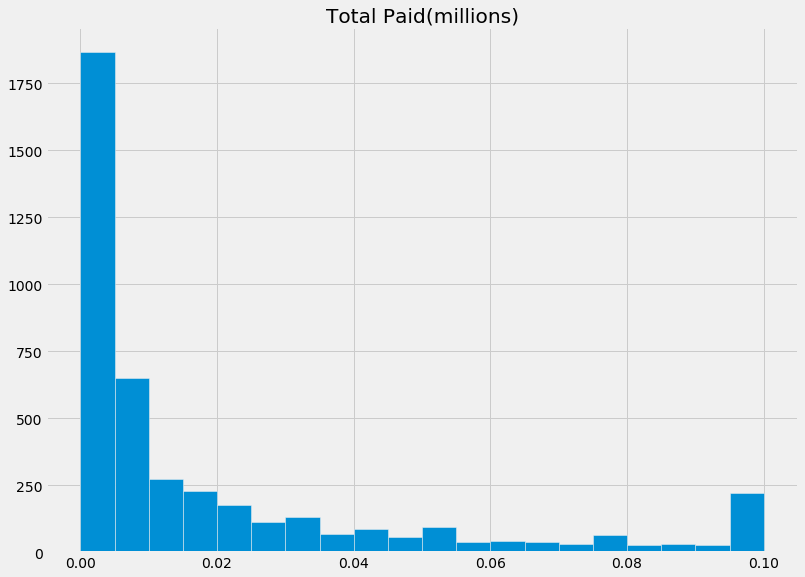

In [42]:
police_total_MVA.hist(column=['Total Paid(millions)'], bins=20, range=(0,0.1))
police_total_nonMVA.hist(column=['Total Paid(millions)'], bins=20, range=(0,0.1))